In [2]:
import pandas as pd
import statistics

In [3]:
df = pd.read_csv("train.csv")

In [3]:
for i in df["Lang"].unique():
    df[df["Lang"] == i].to_csv(f"data/{i}.csv", index=False)

In [4]:
lang = df["Lang"].unique()
res = {}
for l in lang:
    res[l] = {}

for i in df["Lang"].unique():
    res[i]["nb"] = df[df["Lang"] == i]["Lang"].count()
    res[i]["moy length"] = df[df["Lang"] == i]["Text"].str.len().mean()
    res[i]["max length"] = df[df["Lang"] == i]["Text"].str.len().max()
    res[i]["min length"] = df[df["Lang"] == i]["Text"].str.len().min()
    res[i]["esperance length"] = df[df["Lang"] == i]["Text"].str.len().std()
    res[i]["moy nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().mean()
    res[i]["max nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().max()
    res[i]["min nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().min()
    res[i]["esperance nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().std()
    res[i]["moy nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().mean()
    res[i]["max nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().max()
    res[i]["min nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().min()
    res[i]["esperance nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().std()
    

    print(  
        "lang =", i, ", nb=", round(df[df["Lang"] == i]["Lang"].count(), 3), 
        ", moy length=", round(df[df["Lang"] == i]["Text"].str.len().mean(), 3), 
        ", max length=", round(df[df["Lang"] == i]["Text"].str.len().max(), 3),
        ", min length=", round(df[df["Lang"] == i]["Text"].str.len().min(), 3),
        ", esperance length=", round(df[df["Lang"] == i]["Text"].str.len().std(), 3),
        ", moy nb mot :", round(df[df["Lang"] == i]["Text"].str.split().str.len().mean(), 3),
        ", max nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().max(), 3),
        ", min nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().min(), 3),
        ", esperance nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().std(), 3),
        ", moy nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().mean(), 3),
        ", max nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().max(), 3),
        ", min nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().min(), 3),
        ", esperance nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().std(), 3),
    )


lang = GER , nb= 900 , moy length= 1953.183 , max length= 4141 , min length= 333 , esperance length= 367.825 , moy nb mot : 376.533 , max nb mot: 806 , min nb mot: 63 , esperance nb mot: 69.772 , moy nb phrase: 18.434 , max nb phrase: 40 , min nb phrase: 5 , esperance nb phrase: 4.336
lang = TUR , nb= 900 , moy length= 1842.067 , max length= 4154 , min length= 68 , esperance length= 437.446 , moy nb mot : 352.671 , max nb mot: 776 , min nb mot: 15 , esperance nb mot: 83.303 , moy nb phrase: 18.611 , max nb phrase: 44 , min nb phrase: 1 , esperance nb phrase: 5.567
lang = CHI , nb= 900 , moy length= 1852.431 , max length= 4620 , min length= 91 , esperance length= 432.747 , moy nb mot : 361.812 , max nb mot: 876 , min nb mot: 16 , esperance nb mot: 82.095 , moy nb phrase: 18.448 , max nb phrase: 38 , min nb phrase: 2 , esperance nb phrase: 5.329
lang = TEL , nb= 900 , moy length= 1900.249 , max length= 4073 , min length= 747 , esperance length= 386.31 , moy nb mot : 359.039 , max nb mot:

In [4]:
df["length"] = df["Text"].str.len()
df["mot"] = df["Text"].str.split().str.len()
df["phrase"] = df["Text"].str.split(".").str.len()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
from scipy.sparse import hstack
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [14]:
# Vectorize the text and combine with other numerical features
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df['Text'])
X_other_numerical = df[["mot", "length", "phrase"]].values
X_all = hstack((X_text, X_other_numerical))

X_train, X_test, y_train, y_test = train_test_split(X_all, df[["Lang"]], test_size=0.4, random_state=42)

scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_scaled = scaler.transform(X_train)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y_train.values.ravel())

# Make predictions on the test set
scaler = preprocessing.StandardScaler(with_mean=False).fit(X_test)
y_pred = model.predict(scaler.transform(X_test))

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6530303030303031


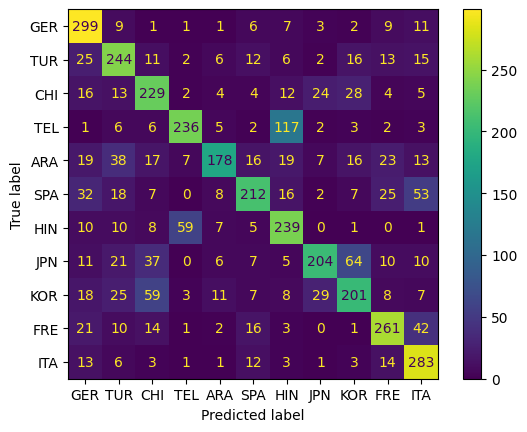

In [48]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=df["Lang"].unique()), display_labels=df["Lang"].unique()).plot()

# Cross Validation

## Shuffle

In [26]:
for i in df["Lang"].unique():
    df_ara = pd.read_csv(f"data/{i}.csv")
    df_ara.sample(frac=1).reset_index(drop=True).to_csv(f"data/{i}.csv", index=False)

In [13]:
import pandas as pd
import glob
import random

files = glob.glob("data/*.csv")

# Read lines from each file
lines_from_each_file = []
for file_path in files:
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]
        lines_from_each_file.append(lines)

# Alternate lines from each file with random order in each cycle
combined_lines = []
num_lines = len(lines_from_each_file[0])
for i in range(num_lines):
    # Shuffle the order of files for each line
    random.shuffle(lines_from_each_file)

    # Add one line from each file in the shuffled order
    for lines in lines_from_each_file:
        combined_lines.append(lines[i])

# Create DataFrame
df = pd.DataFrame([line.split(r',"') for line in combined_lines])
df.drop(columns=[2], inplace=True)
df.head(15)


,0,1
0,ITA,I 'm convinced that having a broad knowledge o...
1,FRE,Do young people enjoy life more than older peo...
2,GER,There are many possibilities for young people ...
3,TUR,Transportation is a very importnat factor in t...
4,ARA,There is a wide difference between an idea and...
5,CHI,Mobile industry has developed for decades and ...
6,JPN,"Experiencing the convinience of the car , we c..."
7,HIN,It my belife that whole purpose of education i...
8,SPA,I agree that `` Most advertisements make produ...
9,KOR,Have you ever bought a product what you do not...


In [ ]:
tel = pd.read_csv("data/TEL.csv")
hin = pd.read_csv("data/HIN.csv")
chi = pd.read_csv("data/CHI.csv")
fre = pd.read_csv("data/FRE.csv")
ita = pd.read_csv("data/ITA.csv")

tel_hin = pd.concat([tel, hin])
tel_hin

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(tel_hin["Text"])
y = tel_hin["Lang"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_scaled = scaler.transform(X_train)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y_train.values.ravel())

# Make predictions on the test set
# scaler = preprocessing.StandardScaler(with_mean=False).fit(X_test)
y_pred = model.predict(scaler.transform(X_test))

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_test, labels=tel_hin["Lang"].unique()), display_labels=tel_hin["Lang"].unique()).plot()

# Bag Of Words

In [19]:
import pandas as pd

df = pd.read_csv("train.csv")

In [20]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Lang"], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_train_count.shape

(7920, 45565)

In [21]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
X_train_tfidf.shape

(7920, 45565)

In [22]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

categories = df["Lang"].unique().tolist()

# Predict the test set results
y_pred = text_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=categories))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         GER       0.94      0.26      0.41       170
         TUR       0.51      0.48      0.50       175
         CHI       0.89      0.39      0.54       193
         TEL       0.27      0.95      0.42       172
         ARA       0.59      0.73      0.65       176
         SPA       0.48      0.77      0.59       164
         HIN       0.86      0.26      0.40       186
         JPN       0.89      0.17      0.28       201
         KOR       0.56      0.31      0.39       196
         FRE       0.83      0.60      0.70       179
         ITA       0.42      0.67      0.51       168

    accuracy                           0.50      1980
   macro avg       0.66      0.51      0.49      1980
weighted avg       0.67      0.50      0.49      1980

[[ 44  11   2  41  15  14   1   0   6   5  31]
 [  0  84   0  46   5   6   0   2   7   0  25]
 [  1   2  75  66   2  33   0   0   8   0   6]
 [  0   0   0 164   0   3   0   0   3   0   2]